In [186]:
# data loading and data management
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm

#data wrangling and feature engineering
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Deep Learning
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [19]:
df= pd.read_csv("/content/loan_data.csv")

In [20]:
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [21]:
df.shape

(9578, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [23]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [24]:
# The target variable is highly imbalanced, so it needs to be handled first
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

print(not_fully_paid_0.shape)
print(not_fully_paid_1.shape)

(8045, 14)
(1533, 14)


In [25]:
# handling the imbalance
from sklearn.utils import resample 
df_minority_not_fully_paid = resample(not_fully_paid_1, replace=True, n_samples = 8045)
df = pd.concat([not_fully_paid_0, df_minority_not_fully_paid])

from sklearn.utils import shuffle
df= shuffle(df)

In [26]:
df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [27]:
num_data = df[['int.rate','installment','log.annual.inc','dti', 'fico','days.with.cr.line','revol.bal','revol.util','not.fully.paid']]
num_data

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,not.fully.paid
8463,0.1450,258.16,10.778956,19.63,657,4379.958333,45076,56.8,1
4770,0.1461,206.86,10.562354,12.76,767,5610.000000,4031,39.1,1
2943,0.1221,666.30,11.661380,9.22,807,7439.958333,0,0.0,0
1885,0.1189,265.32,11.002100,17.24,707,4770.000000,5476,46.4,1
4781,0.1218,566.10,11.058858,15.80,717,6240.000000,21441,80.6,1
...,...,...,...,...,...,...,...,...,...
7899,0.1154,131.99,9.825526,1.30,667,2910.000000,258,86.0,1
8211,0.1772,360.13,11.306848,25.91,657,2430.041667,41603,81.1,1
9547,0.1607,147.82,9.862666,16.19,667,1260.041667,4445,53.5,1
9157,0.1821,174.05,10.595634,13.27,667,2550.000000,6395,59.2,1


In [28]:
num_data_features = num_data.columns
num_data_features

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'not.fully.paid'],
      dtype='object')

In [29]:
cat_data = df[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "not.fully.paid"]]
cat_data

,credit.policy,purpose,inq.last.6mths,delinq.2yrs,not.fully.paid
8463,0,all_other,6,0,1
4770,1,small_business,5,0,1
2943,1,home_improvement,2,0,0
1885,1,debt_consolidation,0,0,1
4781,1,debt_consolidation,1,0,1
...,...,...,...,...,...
7899,0,debt_consolidation,2,0,1
8211,0,debt_consolidation,0,0,1
9547,0,educational,4,0,1
9157,0,all_other,9,0,1


In [30]:
cat_data_features= cat_data.columns
cat_data_features

Index(['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs',
       'not.fully.paid'],
      dtype='object')

In [31]:
num_data.isnull().sum()

int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
not.fully.paid       0
dtype: int64

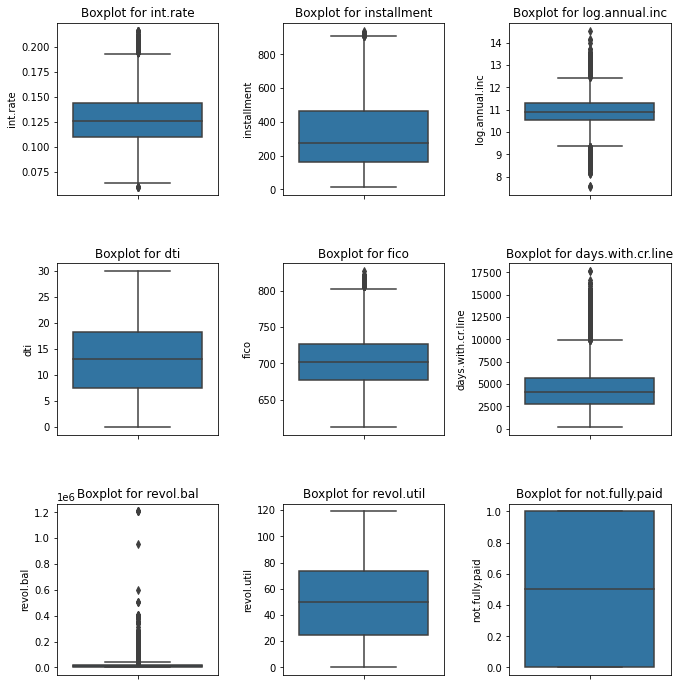

In [32]:
fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize = (11, 12), sharex= True)
fig.subplots_adjust(hspace= .4)
fig.subplots_adjust(wspace= .4)

for i, col in enumerate(num_data):
  ax = plt.subplot(3, 3, i+1)
  sns.boxplot(y= df[col])
  ax.set_title(f"Boxplot for {col}")
plt.show()

In [33]:
#From the graphs above, it can be seen that the outliers exist in the features such as the following: int.rate, installment, log.annual.inc, fico, days.with.cr.line and revol.bal. These outliers will be handles later.

In [34]:
def treat_outliers(df):
  for col in num_data:
    print(col)
    Q3= np.quantile(df[col], 0.75)
    Q1= np.quantile(df[col], 0.25)
    IQR= Q3-Q1
    lower_range = Q1 - 1.5* IQR
    upper_range = Q3 + 1.5* IQR
    df[col] = np.where(df[col]> upper_range, upper_range, df[col])
    df[col] = np.where(df[col]< lower_range, lower_range, df[col])
  return df
treat_outliers(df)

int.rate
installment
log.annual.inc
dti
fico
days.with.cr.line
revol.bal
revol.util
not.fully.paid


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8463,0,all_other,0.1450,258.16,10.778956,19.63,657.0,4379.958333,42006.5,56.8,6,0,0,1.0
4770,1,small_business,0.1461,206.86,10.562354,12.76,767.0,5610.000000,4031.0,39.1,5,0,0,1.0
2943,1,home_improvement,0.1221,666.30,11.661380,9.22,802.0,7439.958333,0.0,0.0,2,0,0,0.0
1885,1,debt_consolidation,0.1189,265.32,11.002100,17.24,707.0,4770.000000,5476.0,46.4,0,0,0,1.0
4781,1,debt_consolidation,0.1218,566.10,11.058858,15.80,717.0,6240.000000,21441.0,80.6,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,0,debt_consolidation,0.1154,131.99,9.825526,1.30,667.0,2910.000000,258.0,86.0,2,0,0,1.0
8211,0,debt_consolidation,0.1772,360.13,11.306848,25.91,657.0,2430.041667,41603.0,81.1,0,0,0,1.0
9547,0,educational,0.1607,147.82,9.862666,16.19,667.0,1260.041667,4445.0,53.5,4,0,0,1.0
9157,0,all_other,0.1821,174.05,10.595634,13.27,667.0,2550.000000,6395.0,59.2,9,0,0,1.0


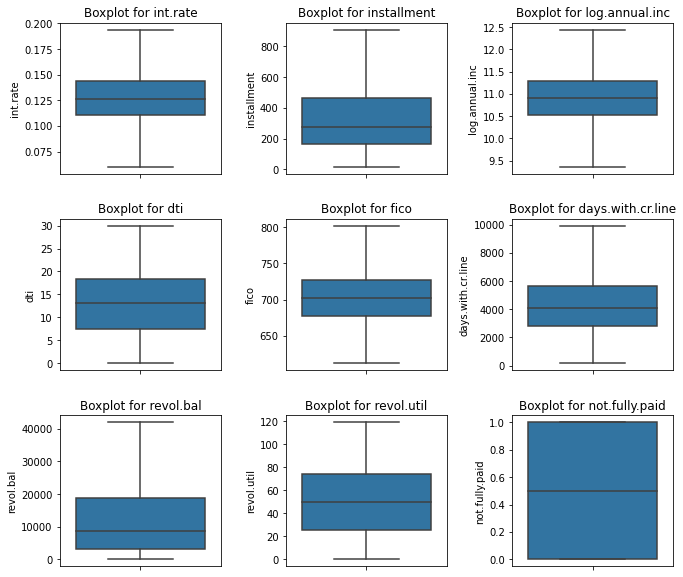

In [35]:
fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize = (11, 10), sharex= True)
fig.subplots_adjust(wspace= 0.4)
fig.subplots_adjust(hspace= 0.3)

for i, col in enumerate(num_data):
  ax = plt.subplot(3, 3, i+1)
  sns.boxplot(y= df[col])
  ax.set_title(f"Boxplot for {col}")
plt.show()

In [36]:
## outliers for numerical data have been treated.

In [37]:
num_data_skew = df[num_data_features].apply(lambda x: skew(x)).sort_values(ascending = False)
num_data_skew

revol.bal            1.109189
installment          0.890819
days.with.cr.line    0.652186
fico                 0.531314
int.rate             0.094830
log.annual.inc       0.013217
not.fully.paid       0.000000
dti                 -0.003486
revol.util          -0.032328
dtype: float64

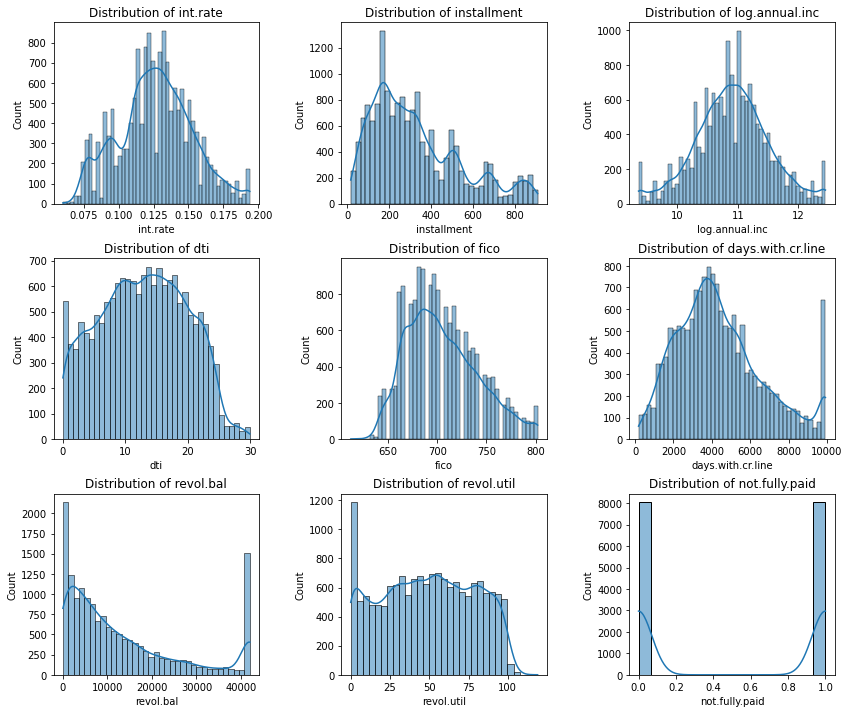

In [38]:
fig, axs = plt.subplots(nrows = 3, ncols= 3, figsize = (14, 12), sharex= True)
fig.subplots_adjust(wspace= 0.4)
fig.subplots_adjust(hspace= 0.3)

for i, col in enumerate(num_data):
  ax = plt.subplot(3, 3, i+1)
  sns.histplot(data=df[col], kde=True)
  ax.set_title(f"Distribution of {col}")
plt.show()

In [39]:
# the skewness normally should be between -1 and 1, it should be later treated normalized before building model

In [40]:
# EDA of numerical variables

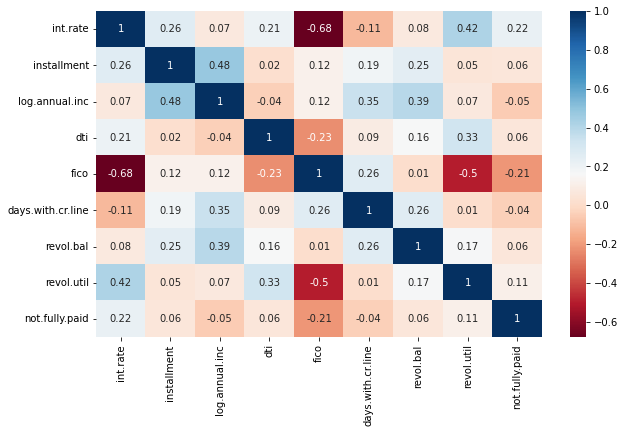

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr().round(2), annot= True, cmap="RdBu") 
plt.show()

In [42]:
num_data.corr()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.216243
revol.util           0.110261
installment          0.062973
dti                  0.057148
revol.bal            0.057056
days.with.cr.line   -0.043608
log.annual.inc      -0.048684
fico                -0.208365
Name: not.fully.paid, dtype: float64

In [44]:
X_num = df[num_data_features]
X_num = X_num.drop(['not.fully.paid'], axis= 1)
X_num

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
8463,0.1450,258.16,10.778956,19.63,657.0,4379.958333,42006.5,56.8
4770,0.1461,206.86,10.562354,12.76,767.0,5610.000000,4031.0,39.1
2943,0.1221,666.30,11.661380,9.22,802.0,7439.958333,0.0,0.0
1885,0.1189,265.32,11.002100,17.24,707.0,4770.000000,5476.0,46.4
4781,0.1218,566.10,11.058858,15.80,717.0,6240.000000,21441.0,80.6
...,...,...,...,...,...,...,...,...
7899,0.1154,131.99,9.825526,1.30,667.0,2910.000000,258.0,86.0
8211,0.1772,360.13,11.306848,25.91,657.0,2430.041667,41603.0,81.1
9547,0.1607,147.82,9.862666,16.19,667.0,1260.041667,4445.0,53.5
9157,0.1821,174.05,10.595634,13.27,667.0,2550.000000,6395.0,59.2


In [45]:
Y = df[['not.fully.paid']]

In [ ]:
# We can do Recursive Feature Elemination with three different models to extract most important numerical features.

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select= 5)
rfe.fit(X_num, Y)
print("Number of Features: %d"% rfe.n_features_)
print("Selected Features: %s"% rfe.support_)
print("Selected Features: %s"% rfe.ranking_)
print("Best features:", X_num.columns[rfe.support_])

Number of Features: 5
Selected Features: [ True  True  True  True  True False False False]
Selected Features: [1 1 1 1 1 4 3 2]
Best features: Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico'], dtype='object')


In [47]:
from sklearn.feature_selection import RFE
from sklearn.datasets import make_friedman1
from sklearn.svm import SVR
X_num, Y = make_friedman1(n_samples=9578, n_features=8, random_state=42)
estimator = SVR(kernel="linear")
rfe = RFE(estimator, n_features_to_select=5, step=1)
rfe = rfe.fit(X_num, Y)
print("Number of Features: %d"% rfe.n_features_)
print("Selected Features: %s"% rfe.support_)
print("Selected Features: %s"% rfe.ranking_)

num_cols = df[num_data_features].drop(['not.fully.paid'], axis = 1)
num_cols = num_cols.columns
num_cols
X_num = pd.DataFrame(X_num, columns = [num_cols])
list(zip(X_num.columns, rfe.support_, rfe.ranking_))
X_num.columns[rfe.support_]

Number of Features: 5
Selected Features: [ True  True  True  True  True False False False]
Selected Features: [1 1 1 1 1 2 3 4]


MultiIndex([(      'int.rate',),
            (   'installment',),
            ('log.annual.inc',),
            (           'dti',),
            (          'fico',)],
           )

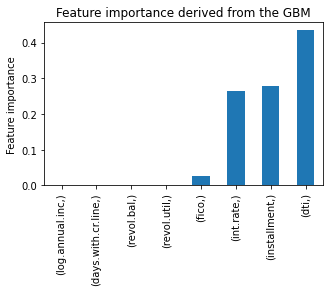

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from feature_engine.selection import RecursiveFeatureElimination
from warnings import simplefilter # import warnings filter
simplefilter(action='ignore', category=FutureWarning)

model = GradientBoostingRegressor(n_estimators=5,random_state=10,)
RFE_model = RecursiveFeatureElimination(estimator = model, scoring = 'r2', threshold = 0.001, cv=2,)
RFE_model.fit(X_num, Y)
RFE_model.feature_importances_.plot.bar(figsize=(5, 3))
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the GBM')
plt.show()

In [ ]:
# we can see from all three models that dti, installment int.rate and fico are most important features.
# we can keep log,annual income and try building our model later on with it if necessary. 

In [ ]:
# Now we ll do EDA and feature engineering for categorical variables.

In [52]:
le = preprocessing.LabelEncoder()
df["purpose"] = le.fit_transform(df["purpose"].astype(str))
cat_data
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8463,0,0,0.1450,258.16,10.778956,19.63,657.0,4379.958333,42006.5,56.8,6,0,0,1.0
4770,1,6,0.1461,206.86,10.562354,12.76,767.0,5610.000000,4031.0,39.1,5,0,0,1.0
2943,1,4,0.1221,666.30,11.661380,9.22,802.0,7439.958333,0.0,0.0,2,0,0,0.0
1885,1,2,0.1189,265.32,11.002100,17.24,707.0,4770.000000,5476.0,46.4,0,0,0,1.0
4781,1,2,0.1218,566.10,11.058858,15.80,717.0,6240.000000,21441.0,80.6,1,0,0,1.0


In [61]:
X_cat = df[cat_data_features]
X_cat = X_cat.drop(['not.fully.paid'], axis= 1)
Y = df['not.fully.paid']

In [55]:
# Feature selection for best categorical variables using Chi2 test 

In [69]:
f_p_values = chi2(X_cat, Y)
p_values = pd.Series(f_p_values[1], index= X_cat.columns)
p_values.sort_values(ascending = False, inplace=True)
p_values

delinq.2yrs       3.301854e-02
purpose           5.448400e-24
credit.policy     4.337263e-36
inq.last.6mths    0.000000e+00
dtype: float64

In [139]:
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X_cat, Y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,X_cat.columns):
  if bool:
    new_feature.append(feature)
new_feature

['credit.policy', 'purpose', 'inq.last.6mths']

In [140]:
# Categorical features such as inq.last.6mths, credit.policy, and purpose have a p-value that is less than 0.05. These will therefore be taken into consideration for model training as they are seen to mostly influence wether a client will default or not.

In [142]:
# Before building the model we divide the data into features and target variables, split them and scale them
X = df[['dti','fico','installment', 'int.rate','log.annual.inc','purpose','inq.last.6mths','credit.policy']]
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc =StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [166]:
# Build Model
model  = keras.Sequential(
    [
        keras.layers.Dense(
        256, activation="relu", input_shape=[8]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 256)               2304      
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 1)                 257       
                                                                 
Total params: 134,145
Trainable params: 134,145
Non-t

In [178]:
# complie model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [182]:
# use call backs for optimization
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=1600, callbacks=[early_stopping],verbose=1,)

Epoch 1/1600
51/51 [==============================] - 1s 21ms/step - loss: 0.2060 - binary_accuracy: 0.9146 - val_loss: 0.3998 - val_binary_accuracy: 0.8745
Epoch 2/1600
51/51 [==============================] - 1s 15ms/step - loss: 0.1972 - binary_accuracy: 0.9175 - val_loss: 0.3892 - val_binary_accuracy: 0.8751
Epoch 3/1600
51/51 [==============================] - 1s 14ms/step - loss: 0.2008 - binary_accuracy: 0.9162 - val_loss: 0.4058 - val_binary_accuracy: 0.8698
Epoch 4/1600
51/51 [==============================] - 1s 14ms/step - loss: 0.1963 - binary_accuracy: 0.9197 - val_loss: 0.4193 - val_binary_accuracy: 0.8676
Epoch 5/1600
51/51 [==============================] - 1s 13ms/step - loss: 0.2073 - binary_accuracy: 0.9128 - val_loss: 0.4283 - val_binary_accuracy: 0.8605
Epoch 6/1600
51/51 [==============================] - 1s 14ms/step - loss: 0.1943 - binary_accuracy: 0.9185 - val_loss: 0.4172 - val_binary_accuracy: 0.8682
Epoch 7/1600
51/51 [==============================] - 1s 1

In [183]:
predictions =(model.predict(X_test)>0.5).astype("int32")
              
predictions

101/101 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [184]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)

0.875077688004972

In [165]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      1617
         1.0       0.83      0.94      0.88      1601

    accuracy                           0.87      3218
   macro avg       0.88      0.87      0.87      3218
weighted avg       0.88      0.87      0.87      3218



In [188]:
print(metrics.confusion_matrix(y_test, predictions))

[[1270  347]
 [  55 1546]]


In [ ]:
It can be seen that our model has an accuracy of 87.50 which is quite good.